#  El Problema

Vamos a utilizar los datos de la competición de predicción de los datos del Dengue. Mas información en [enlace](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

El objetivo del ejercicio es por un lado jugar con una red neuronal para resolver un problema de regresión y por otro participar en una competición de datos. 


# Setting Preliminares

Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas. 

In [169]:
# carga de datos
import pandas as pd
import io
# from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

# Carga de Datos

En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab

En primer lugar subimos los datos de entrenamiento sin campo objetivo (dengue_features_train)


In [170]:
train_feat = pd.read_csv('dengue_features_train.csv')
train_feat.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [171]:
train_feat.shape

(1456, 24)

Posteriormente subimos los datos que únicamente nos proporcionan el número de casos de dengue para las semanas de entrenamiento (dengue_labels_train)

In [172]:
train_labels = pd.read_csv('dengue_labels_train.csv')
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


Mezclamos los dos conjuntos de datos para tenerlos en un único dataframe

In [173]:
train = pd.merge(train_feat,train_labels,on=['city', 'year', 'weekofyear'])
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [174]:
train.shape

(1456, 25)

Finalmente subimos los datos para generar la evaluación final (dengue_features_test)

In [175]:
test = pd.read_csv('dengue_features_test.csv')
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [176]:
test.shape

(416, 24)

# Preproceso

Aquí irían todas las funciones y transformaciones que permitieran el uso de las variables en los siguientes clasificadores, por ejemplo la transformación de las variables categóricas en numéricas, etc.

In [177]:
train.drop(["week_start_date", "year", "weekofyear"], axis = 1, inplace = True)
test.drop(["week_start_date", "year", "weekofyear"], axis = 1, inplace = True)
train.head()

,city,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Trataremos los valores perdidos que los hay dado que nos evitarían tener un modelo de los datos que tenemos.

In [178]:
pd.isnull(train).sum()

city                                       0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
total_cases                                0
dtype: int

Los vamos a procesar de forma automática completandolos con el método ffill (con el valor previo)

In [179]:
train.interpolate(inplace=True)
pd.isnull(train).any()

city                                     False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
total_cases  

Y aplicamos lo mismo para el test

In [180]:
test.interpolate(inplace=True)
pd.isnull(test).any()

city                                     False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

### Selección de variables
A continuación, se obtiene las estadísticas más relevantes de las variables para ver que forma tienen

In [181]:
train.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.131490,0.127823,0.203130,0.201963,45.702091,298.697750,299.221723,295.244555,303.420158,295.718441,...,82.173009,45.702091,16.744659,4.900618,27.181438,8.095505,32.446497,22.098043,39.362294,24.675137
std,0.137272,0.119478,0.073781,0.083491,43.651356,1.359878,1.260384,1.525955,3.233153,2.559010,...,7.152190,43.651356,1.540958,3.542762,1.281116,2.127521,1.959090,1.570524,47.285701,43.596000
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,0.037400,0.048092,0.154057,0.144455,9.785000,297.657857,298.257143,294.117857,301.000000,293.900000,...,77.196429,9.785000,15.554643,2.328571,26.314286,6.528571,31.100000,21.100000,8.850000,5.000000
50%,0.115550,0.115926,0.195664,0.190121,38.320000,298.640000,299.285714,295.638571,302.400000,296.200000,...,80.287857,38.320000,17.084286,2.857143,27.400000,7.350000,32.800000,22.200000,24.050000,12.000000
75%,0.231443,0.213429,0.247461,0.246579,70.227500,299.827500,300.207143,296.457857,305.500000,297.900000,...,86.437500,70.227500,17.976071,7.632143,28.130804,9.603571,33.900000,23.300000,53.900000,28.000000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


En el dataset aparecen varias variables repetidas, ya que provienen de bases de datos distintas: temperatura media, minima, máxima, precipitación total...
Para reducir la dimensionalidad y eliminar variables que indican lo mismo y por tanto muy correlacionadas entre si, se van a transformar columnas para quedarse solo con la media de las variables repetidas.
Como no todas las variables están en las mismas unidades, hay que convertirlas antes de hacer la  media. La temperatura está en Kelvin en las variables "reanalysis..." y en Celsius en las variables "station...". Para pasarla de Kelvin a Celsius hay que restarle 273.


In [182]:
# Temperatura media
train['temp_media'] = (train.reanalysis_air_temp_k - 273 + train.reanalysis_avg_temp_k - 273 + train.station_avg_temp_c)/3
test['temp_media'] = (test.reanalysis_air_temp_k - 273 + test.reanalysis_avg_temp_k - 273 + test.station_avg_temp_c)/3

# Precipitación total
train['prec_total'] = train[['precipitation_amt_mm','reanalysis_sat_precip_amt_mm', 'station_precip_mm']].mean(axis=1)
test['prec_total'] = test[['precipitation_amt_mm','reanalysis_sat_precip_amt_mm', 'station_precip_mm']].mean(axis=1)

# Temperatura máxima
train['temp_max'] = (train.station_max_temp_c + train.reanalysis_max_air_temp_k - 273)/2
test['temp_max'] = (test.station_max_temp_c + test.reanalysis_max_air_temp_k - 273)/2

# Temperatura mínima
train['temp_min'] = (train.station_min_temp_c + train.reanalysis_min_air_temp_k - 273)/2
test['temp_min'] = (test.station_min_temp_c + test.reanalysis_min_air_temp_k - 273)/2

# ndvi
train['ndvi_media'] = train[['ndvi_se','ndvi_sw', 'ndvi_ne', 'ndvi_nw']].mean(axis=1)
test['ndvi_media'] = test[['ndvi_se','ndvi_sw', 'ndvi_ne', 'ndvi_nw']].mean(axis=1)

train.drop(['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'station_avg_temp_c', 'precipitation_amt_mm','reanalysis_sat_precip_amt_mm', 
            'station_precip_mm', 'station_max_temp_c', 'reanalysis_max_air_temp_k', 'station_min_temp_c', 'reanalysis_min_air_temp_k', 
            'ndvi_se','ndvi_sw', 'ndvi_ne', 'ndvi_nw'], 
           axis = 1, inplace = True)
test.drop(['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'station_avg_temp_c', 'precipitation_amt_mm','reanalysis_sat_precip_amt_mm', 
            'station_precip_mm', 'station_max_temp_c', 'reanalysis_max_air_temp_k', 'station_min_temp_c', 'reanalysis_min_air_temp_k', 
            'ndvi_se','ndvi_sw', 'ndvi_ne', 'ndvi_nw'], 
           axis = 1, inplace = True)

Existen otras categorías del dataset que no aportan información valiosa y pueden ser borradas:
Las variables que indican el rango de temperatura son redundantes, ya que indican la diferencia entre la máxima y la mínima, por lo que se pueden eliminar.
También se elimina la variable "reanalysis_dew_point_temp_k", que indica la temperatura de rocío y es función de la humemdad y temperatura.
Las variables "reanalysis_specific_humidity_g_per_kg" y "reanalysis_precip_amt_kg_per_m2" indican la humedad y precipitación en otras unidades, por lo que también son eliminadas.

In [183]:
train.drop(['station_diur_temp_rng_c', 'reanalysis_tdtr_k', 'reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_precip_amt_kg_per_m2'], 
           axis = 1, inplace = True)
test.drop(['station_diur_temp_rng_c', 'reanalysis_tdtr_k', 'reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_precip_amt_kg_per_m2'], 
           axis = 1, inplace = True)

Se cambia el nombre de la columna que no se modificó para simplificar el dataframe

In [184]:
train.rename({'reanalysis_relative_humidity_percent': 'rel_humidity'}, inplace=True, axis=1)
test.rename({'reanalysis_relative_humidity_percent': 'rel_humidity'}, inplace=True, axis=1)

El dataset queda de la siguiente manera, con 6 características + la columna objetivo

In [185]:
train.describe()

,rel_humidity,total_cases,temp_media,prec_total,temp_max,temp_min,ndvi_media
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,82.173009,24.675137,26.366970,43.588826,31.433328,22.408242,0.166101
std,7.152190,43.596000,1.187925,39.250335,2.447055,1.923175,0.091098
min,57.787143,0.000000,23.130476,0.000000,26.100000,15.150000,-0.092565
25%,77.196429,5.000000,25.441488,12.725000,29.750000,21.100000,0.099902
50%,80.287857,12.000000,26.386905,35.180000,31.100000,22.300000,0.146983
75%,86.437500,28.000000,27.366310,63.483333,32.950000,24.100000,0.225478
max,98.610000,461.000000,29.202381,304.800000,39.050000,25.900000,0.503982


In [186]:
train.dtypes

city             object
rel_humidity    float64
total_cases       int64
temp_media      float64
prec_total      float64
temp_max        float64
temp_min        float64
ndvi_media      float64
dtype: object

También tenemos que transformar nuestras variables categóricas, en este caso una única variable que es la ciudad para lo que vamos a utilizar un *binarizador* para train y para test

In [187]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
train['city_bin'] = lb.fit_transform(train['city'])
test['city_bin'] = lb.fit_transform(test['city'])
train.drop("city", axis = 1, inplace = True)
test.drop("city", axis = 1, inplace = True)

<AxesSubplot:>

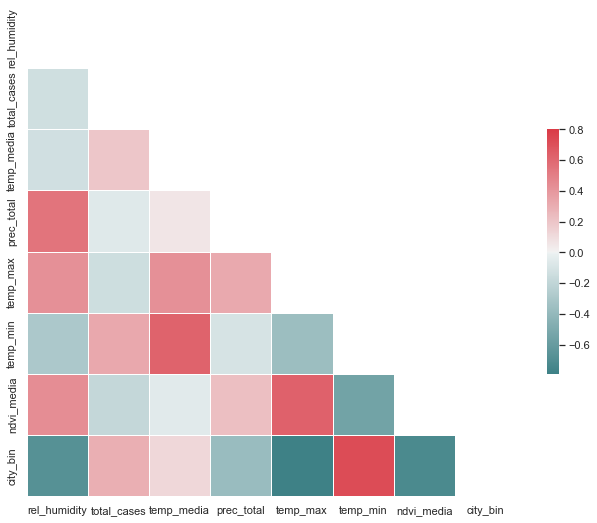

In [188]:
# Se obtienen los coeficientes de correlacion para lo que hay que trasponer el dataframe
R = np.corrcoef(np.transpose(train))

# Gráfico de la matriz de correlaciones
sns.set(style="whitegrid")
mask = np.zeros_like(R, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=train.columns, yticklabels=train.columns,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Se observa que existen variables bastante correladas entre sí, como era de esperar: precipitación con la humedad, temperatura mínima con la media, ndvi con temperatura máxima y mínima. De momento no se elimina ninguna más hasta avanzar más con la exploración. 
También se ve que las variables más correlacionadas con total_cases son: temp_media, temp_min y city_bin. Estas son las que serán las más importantes en el modelo.

### Eliminación de outliers
Para ver si hay outliers presentes en el dataset, se dibujan los boxplots de cada columna.

<AxesSubplot:>

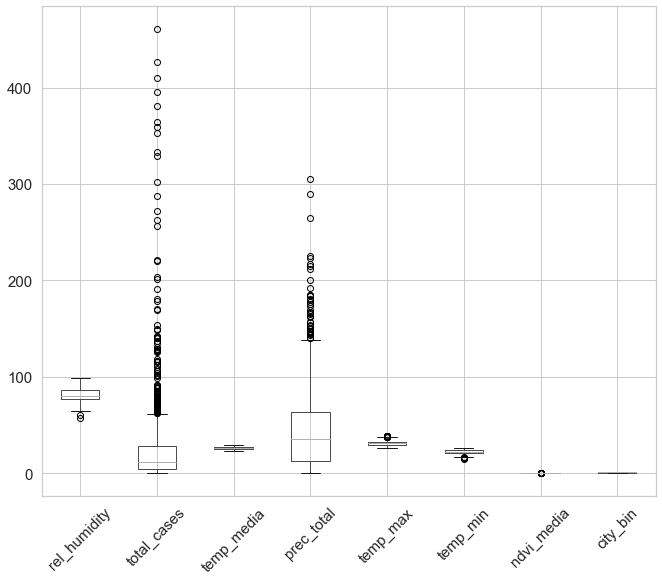

In [189]:
train.boxplot(fontsize=15, rot=45, figsize=(11, 9))

Se borran los outliers observados, analizados con más profundidad en la actividad 1

In [190]:
train.drop(train[train.prec_total >150].index, inplace= True)
train.drop(train[train.rel_humidity <63].index, inplace= True)
train.drop(train[train.ndvi_media>0.45].index, inplace= True)
train.shape

(1423, 8)

In [191]:
train.reset_index(inplace=True, drop=True)
train

,rel_humidity,total_cases,temp_media,prec_total,temp_max,temp_min,ndvi_media,city_bin
0,73.365714,4,24.919524,13.613333,28.10,21.45,0.150606,1
1,77.368571,5,25.789524,18.080000,29.80,22.80,0.157479,1
2,82.052857,4,26.124762,36.826667,29.85,23.55,0.133315,1
3,80.337143,3,26.562381,11.573333,30.85,23.65,0.209286,1
4,80.460000,6,27.375238,6.946667,31.95,24.20,0.239235,1
...,...,...,...,...,...,...,...,...
1418,88.765714,5,27.579683,45.866667,36.05,21.95,0.302627,0
1419,91.600000,8,26.385397,69.846667,35.10,20.30,0.170557,0
1420,94.280000,1,24.197143,41.760000,32.35,19.30,0.219296,0
1421,94.660000,1,24.433492,45.113333,32.15,19.95,0.296014,0


### Normalización
Por último, se normalizan todas las variables para que las técnicas de aprendizaje automático funcionen mejor.

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(train.drop('total_cases', axis=1))
X_test_norm = scaler.transform(test)
print('Máximos train: ', X_train_norm.max(axis=0))
print('Mínimos train: ', X_train_norm.min(axis=0))
print('Máximos test: ', X_test_norm.max(axis=0))
print('Mínimos test: ', X_test_norm.min(axis=0))

Máximos train:  [1. 1. 1. 1. 1. 1. 1.]
Mínimos train:  [0. 0. 0. 0. 0. 0. 0.]
Máximos test:  [0.98152823 1.04046741 1.01217608 1.05405405 1.0372093  0.99594685
 1.        ]
Mínimos test:  [ 0.00770008  0.07220349  0.          0.00772201  0.00930233 -0.0016313
  0.        ]


In [193]:
train_df = pd.DataFrame(X_train_norm) 
labels = train.columns.drop('total_cases')
train_df.columns = labels
train_df['total_cases'] = train['total_cases']

In [194]:
train_df.tail()

,rel_humidity,temp_media,prec_total,temp_max,temp_min,ndvi_media,city_bin,total_cases
1418,0.710048,0.732753,0.306855,0.768340,0.632558,0.731051,0.0,5
1419,0.793529,0.536063,0.467285,0.694981,0.479070,0.486740,0.0,8
1420,0.872465,0.175672,0.279381,0.482625,0.386047,0.576901,0.0,1
1421,0.883657,0.214598,0.301815,0.467181,0.446512,0.718819,0.0,1
1422,0.719389,0.549878,0.327461,0.629344,0.520930,0.689717,0.0,4


# Construcción y evaluación preliminar del modelo

Min Value uniform : 21.22375295903708 (29)
Min Value distance : 21.18716655538181 (29)


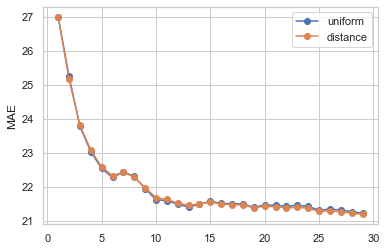

In [195]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits = 10, shuffle = False) #
# se podría utilizar https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train_df):
          # División train test aleatoria
          f_train = train_df.loc[train_fold]
          f_test = train_df.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['total_cases'], axis=1), 
                               y = f_train['total_cases'])
          y_pred = knn.predict(X = f_test.drop(['total_cases'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['total_cases'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 


In [196]:
train_df.head()

,rel_humidity,temp_media,prec_total,temp_max,temp_min,ndvi_media,city_bin,total_cases
0,0.256459,0.294644,0.091075,0.154440,0.586047,0.449834,1.0,4
1,0.374358,0.437926,0.120958,0.285714,0.711628,0.462548,1.0,5
2,0.512329,0.493138,0.246376,0.289575,0.781395,0.417847,1.0,4
3,0.461794,0.565211,0.077427,0.366795,0.790698,0.558383,1.0,3
4,0.465413,0.699082,0.046474,0.451737,0.841860,0.613785,1.0,6


In [197]:
# constructor
n_neighbors = 13
weights = 'uniform'
model = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit and predict

model.fit( X = train_df.drop('total_cases', axis=1), y = train_df['total_cases'])
y_pred = model.predict(X = test)


from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)


# Generación del Resultado Final

Generamos el fichero de salida segun el Submission format

* Realizamos la predicción sobre el test

In [198]:
y_pred

array([ 7.53846154,  9.23076923,  8.84615385, 10.07692308,  8.46153846,
        7.92307692,  7.84615385,  9.23076923,  8.76923077,  8.53846154,
        9.23076923,  8.84615385,  8.84615385,  8.15384615,  7.92307692,
        8.84615385,  7.92307692,  9.23076923,  7.92307692,  7.53846154,
        7.92307692,  6.84615385,  7.92307692,  8.53846154,  7.84615385,
        7.84615385,  8.84615385,  9.23076923,  8.15384615,  7.92307692,
        9.23076923,  8.84615385,  8.84615385,  9.23076923,  8.84615385,
        8.84615385,  9.        ,  9.        ,  8.        ,  7.92307692,
        8.84615385,  9.23076923,  8.53846154,  8.07692308,  7.92307692,
        8.46153846,  7.92307692,  8.76923077,  8.84615385,  8.84615385,
        9.        ,  9.23076923,  9.23076923,  8.15384615,  8.46153846,
        7.92307692,  7.53846154,  8.92307692,  7.92307692,  7.84615385,
        7.92307692,  8.69230769,  7.92307692,  7.92307692,  8.76923077,
        7.92307692,  8.53846154,  9.23076923,  7.53846154,  8.53

* Redondeamos el resultado

In [199]:
# round the result and cast to int
import numpy as np
y = np.rint(y_pred) # round
y = y.astype(int) # cast to int
res = np.hstack(y)

res

array([ 8,  9,  9, 10,  8,  8,  8,  9,  9,  9,  9,  9,  9,  8,  8,  9,  8,
        9,  8,  8,  8,  7,  8,  9,  8,  8,  9,  9,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  8,  8,  9,  9,  9,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  8,  8,  8,  8,  9,  8,  8,  8,  9,  8,  8,  9,  8,  9,  9,
        8,  9,  8,  9,  8,  8,  8,  8,  9,  8,  9,  9,  8,  8,  8,  8,  9,
        8,  9,  9,  9,  9,  9,  8,  9,  9,  9,  8,  8,  9,  8,  9,  9,  8,
        9,  8,  8,  9,  8,  8,  8,  8,  8,  9,  8,  8,  9,  9,  8,  8,  9,
        9,  8,  9,  8,  8,  8,  8,  8,  8,  7,  8,  9,  9,  8,  8,  8,  9,
        9,  8,  8,  8,  8,  8,  8,  9,  9,  9,  8,  8,  9,  8,  9,  9,  9,
        9,  9,  8,  9,  8,  9,  9,  8,  8,  8,  8,  8,  8,  8,  9,  8,  8,
        8,  8,  8,  7,  7,  8,  9,  8,  8,  8,  8,  8,  9,  8,  8,  8,  8,
        9,  8,  7,  8,  9,  9,  9,  9,  8,  8,  9,  9,  9,  9,  8,  8,  8,
        7,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  8,  8,  8,
        8,  8,  8,  8,  9

In [200]:
y_pred_no_neg = res.copy()

In [201]:
y_pred_no_neg[y_pred < 0] = 0
y_pred_no_neg

array([ 8,  9,  9, 10,  8,  8,  8,  9,  9,  9,  9,  9,  9,  8,  8,  9,  8,
        9,  8,  8,  8,  7,  8,  9,  8,  8,  9,  9,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  8,  8,  9,  9,  9,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  8,  8,  8,  8,  9,  8,  8,  8,  9,  8,  8,  9,  8,  9,  9,
        8,  9,  8,  9,  8,  8,  8,  8,  9,  8,  9,  9,  8,  8,  8,  8,  9,
        8,  9,  9,  9,  9,  9,  8,  9,  9,  9,  8,  8,  9,  8,  9,  9,  8,
        9,  8,  8,  9,  8,  8,  8,  8,  8,  9,  8,  8,  9,  9,  8,  8,  9,
        9,  8,  9,  8,  8,  8,  8,  8,  8,  7,  8,  9,  9,  8,  8,  8,  9,
        9,  8,  8,  8,  8,  8,  8,  9,  9,  9,  8,  8,  9,  8,  9,  9,  9,
        9,  9,  8,  9,  8,  9,  9,  8,  8,  8,  8,  8,  8,  8,  9,  8,  8,
        8,  8,  8,  7,  7,  8,  9,  8,  8,  8,  8,  8,  9,  8,  8,  8,  8,
        9,  8,  7,  8,  9,  9,  9,  9,  8,  8,  9,  9,  9,  9,  8,  8,  8,
        7,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  8,  8,  8,
        8,  8,  8,  8,  9

* Generamos el fichero de salida

In [202]:
# generate output
test_original = pd.read_csv('dengue_features_test.csv')
output = pd.DataFrame({ 'city': test_original['city'], 'year': test_original['year'], 'weekofyear': test_original['weekofyear'], 
                       'total_cases': y_pred_no_neg})

name = 'knn_13_uniform' + '_results.csv'
output.to_csv(name, index= False)
# from google.colab import files

#with open('result.csv', 'w') as f:
#  output.to_csv(f,  index = False)
  

#files.download('result.csv')

output.head()


,city,year,weekofyear,total_cases
0,sj,2008,18,8
1,sj,2008,19,9
2,sj,2008,20,9
3,sj,2008,21,10
4,sj,2008,22,8
